# Import dependencies

In [1]:
# Reload modules whenever underlying code changes
%load_ext autoreload
%autoreload 2

In [2]:
# pdb will automatically run on exceptions
#%pdb on # currently not working due to https://github.com/ipython/ipykernel/issues/422

In [3]:
# import os

# # Only occupy one GPU, as in https://stackoverflow.com/questions/37893755/tensorflow-set-cuda-visible-devices-within-jupyter
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
# os.environ["CUDA_VISIBLE_DEVICES"]="0"

# # Only allocate GPU memory as needed
# os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

# # Suppress tf warning messages
# os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"

In [4]:
%matplotlib inline
from sgm.dependencies import *


Bad key savefig.frameon in file /home/mgaltier200/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /home/mgaltier200/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /home/mgaltier200/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably 

# Initialize untrained agent

In [5]:
# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True
# tf.enable_eager_execution(config=config)

In [6]:
#tf.debugging.set_log_device_placement(True)
#tf.test.is_gpu_available()

In [7]:
tf.reset_default_graph()

In [8]:
from sgm.envs import env_load_fn
from sgm.agent import UvfAgent

# If you change the environment parameters below, make sure to run
# tf.reset_default_graph() in the cell above before training.
max_episode_steps = 20
env_name = 'FourRooms'  # Choose one of the environments shown above. 
resize_factor = 9  # Inflate the environment to increase the difficulty.
thin = True # If True, resize by expanding open space, not walls, to make walls thin
desc_name = "thinned_" + env_name.lower() if thin else env_name.lower()

base_dir = os.path.join(os.getcwd(), os.pardir, "agents")
model_dir = os.path.join(base_dir, desc_name)

tf_env = env_load_fn(env_name, max_episode_steps,
                     resize_factor=resize_factor,
                     terminate_on_timeout=False,
                     thin=thin)
eval_tf_env = env_load_fn(env_name, max_episode_steps,
                          resize_factor=resize_factor,
                          terminate_on_timeout=True,
                          thin=thin)

agent = UvfAgent(
    tf_env.time_step_spec(),
    tf_env.action_spec(),
    max_episode_steps=max_episode_steps,
    use_distributional_rl=True,
    ensemble_size=3)

/home/mgaltier200/anaconda3/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


# Train the agent

In [9]:
from sgm.trainer import train_eval

train_eval(agent,
          tf_env,
          eval_tf_env,
          initial_collect_steps=1000,
          eval_interval=1000,
          num_eval_episodes=10,
          num_iterations=30000,
          save_model_dir=model_dir,
          experiment_name=f"{env_name}_coordinate_{max_episode_steps}steps")

INFO:tensorflow:random_seed = 0
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Saving checkpoints to directory /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-56-10-AM/ckpt
INFO:tensorflow:Creating tensorboard summary writer with directory /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-56-10-AM
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



  3%|▎         | 999/30000 [00:21<10:08, 47.66it/s] 

Saved checkpoint for step 1000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-56-10-AM/ckpt/ckpt-1
INFO:tensorflow:step = 1000, loss = 1.964991
INFO:tensorflow:49.227 steps/sec
INFO:tensorflow:step = 1000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -16.50
INFO:tensorflow:		 predicted_dist = 16.7 (0.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -20.00
INFO:tensorflow:		 predicted_dist = 17.1 (0.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 16.8 (0.5)
INFO:tensorflow:	 eval_time = 4.27


  7%|▋         | 1996/30000 [00:44<08:26, 55.24it/s]  

Saved checkpoint for step 2000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-56-10-AM/ckpt/ckpt-2
INFO:tensorflow:step = 2000, loss = 0.897564
INFO:tensorflow:60.998 steps/sec
INFO:tensorflow:step = 2000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -12.50
INFO:tensorflow:		 predicted_dist = 18.0 (1.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -17.70
INFO:tensorflow:		 predicted_dist = 18.2 (0.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 17.9 (0.3)
INFO:tensorflow:	 eval_time = 3.28


 10%|▉         | 2995/30000 [01:05<07:52, 57.19it/s]  

Saved checkpoint for step 3000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-56-10-AM/ckpt/ckpt-3
INFO:tensorflow:step = 3000, loss = 0.836737
INFO:tensorflow:61.571 steps/sec
INFO:tensorflow:step = 3000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -14.40
INFO:tensorflow:		 predicted_dist = 17.8 (0.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -20.00
INFO:tensorflow:		 predicted_dist = 18.3 (0.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 18.1 (0.3)
INFO:tensorflow:	 eval_time = 3.20


 13%|█▎        | 3995/30000 [01:26<08:23, 51.66it/s]  

Saved checkpoint for step 4000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-56-10-AM/ckpt/ckpt-4
INFO:tensorflow:step = 4000, loss = 1.050556
INFO:tensorflow:61.792 steps/sec
INFO:tensorflow:step = 4000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -14.50
INFO:tensorflow:		 predicted_dist = 16.2 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -17.70
INFO:tensorflow:		 predicted_dist = 16.2 (1.3)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 17.3 (0.7)
INFO:tensorflow:	 eval_time = 3.31


 17%|█▋        | 4994/30000 [01:45<06:07, 68.11it/s]  

Saved checkpoint for step 5000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-56-10-AM/ckpt/ckpt-5
INFO:tensorflow:step = 5000, loss = 1.153118
INFO:tensorflow:69.279 steps/sec
INFO:tensorflow:step = 5000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -18.20
INFO:tensorflow:		 predicted_dist = 17.4 (1.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -20.00
INFO:tensorflow:		 predicted_dist = 17.6 (0.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 17.7 (0.5)
INFO:tensorflow:	 eval_time = 3.56


 20%|█▉        | 5997/30000 [02:03<05:41, 70.20it/s]  

Saved checkpoint for step 6000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-56-10-AM/ckpt/ckpt-6
INFO:tensorflow:step = 6000, loss = 1.017230
INFO:tensorflow:72.644 steps/sec
INFO:tensorflow:step = 6000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -16.70
INFO:tensorflow:		 predicted_dist = 17.1 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -17.60
INFO:tensorflow:		 predicted_dist = 17.3 (1.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 17.3 (1.7)
INFO:tensorflow:	 eval_time = 2.72


 23%|██▎       | 6996/30000 [02:23<06:03, 63.22it/s]

Saved checkpoint for step 7000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-56-10-AM/ckpt/ckpt-7
INFO:tensorflow:step = 7000, loss = 1.230082
INFO:tensorflow:63.869 steps/sec
INFO:tensorflow:step = 7000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -16.40
INFO:tensorflow:		 predicted_dist = 17.6 (0.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -18.60
INFO:tensorflow:		 predicted_dist = 17.3 (1.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.20
INFO:tensorflow:		 predicted_dist = 17.1 (1.4)
INFO:tensorflow:	 eval_time = 3.12


 27%|██▋       | 7999/30000 [02:43<06:57, 52.69it/s]

Saved checkpoint for step 8000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-56-10-AM/ckpt/ckpt-8
INFO:tensorflow:step = 8000, loss = 1.197025
INFO:tensorflow:66.271 steps/sec
INFO:tensorflow:step = 8000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -19.20
INFO:tensorflow:		 predicted_dist = 15.5 (1.7)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -20.00
INFO:tensorflow:		 predicted_dist = 16.8 (2.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 17.5 (1.3)
INFO:tensorflow:	 eval_time = 3.18


 30%|██▉       | 8996/30000 [03:03<06:01, 58.04it/s]

Saved checkpoint for step 9000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-56-10-AM/ckpt/ckpt-9
INFO:tensorflow:step = 9000, loss = 1.257872
INFO:tensorflow:63.515 steps/sec
INFO:tensorflow:step = 9000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -14.60
INFO:tensorflow:		 predicted_dist = 15.5 (1.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -20.00
INFO:tensorflow:		 predicted_dist = 16.0 (1.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 17.1 (0.9)
INFO:tensorflow:	 eval_time = 3.10


 33%|███▎      | 9997/30000 [03:24<06:04, 54.87it/s]

Saved checkpoint for step 10000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-56-10-AM/ckpt/ckpt-10
INFO:tensorflow:step = 10000, loss = 1.588649
INFO:tensorflow:61.367 steps/sec
INFO:tensorflow:step = 10000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -18.40
INFO:tensorflow:		 predicted_dist = 15.7 (0.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -18.40
INFO:tensorflow:		 predicted_dist = 16.4 (0.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.90
INFO:tensorflow:		 predicted_dist = 17.6 (0.7)
INFO:tensorflow:	 eval_time = 2.88


 37%|███▋      | 10998/30000 [03:45<05:42, 55.52it/s]

Saved checkpoint for step 11000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-56-10-AM/ckpt/ckpt-11
INFO:tensorflow:step = 11000, loss = 1.102381
INFO:tensorflow:61.259 steps/sec
INFO:tensorflow:step = 11000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -11.10
INFO:tensorflow:		 predicted_dist = 17.4 (1.7)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -20.00
INFO:tensorflow:		 predicted_dist = 17.5 (1.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.10
INFO:tensorflow:		 predicted_dist = 18.3 (1.3)
INFO:tensorflow:	 eval_time = 3.10


 40%|███▉      | 11994/30000 [04:03<04:09, 72.21it/s]

Saved checkpoint for step 12000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-56-10-AM/ckpt/ckpt-12
INFO:tensorflow:step = 12000, loss = 0.865945
INFO:tensorflow:72.144 steps/sec
INFO:tensorflow:step = 12000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -18.10
INFO:tensorflow:		 predicted_dist = 17.6 (1.7)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -19.10
INFO:tensorflow:		 predicted_dist = 17.7 (1.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.40
INFO:tensorflow:		 predicted_dist = 18.8 (0.7)
INFO:tensorflow:	 eval_time = 3.21


 43%|████▎     | 12996/30000 [04:21<04:13, 67.11it/s]

Saved checkpoint for step 13000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-56-10-AM/ckpt/ckpt-13
INFO:tensorflow:step = 13000, loss = 1.012158
INFO:tensorflow:71.043 steps/sec
INFO:tensorflow:step = 13000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -16.30
INFO:tensorflow:		 predicted_dist = 18.0 (1.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -20.00
INFO:tensorflow:		 predicted_dist = 18.3 (0.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 18.8 (0.8)
INFO:tensorflow:	 eval_time = 2.59


 47%|████▋     | 13998/30000 [04:39<04:01, 66.38it/s]

Saved checkpoint for step 14000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-56-10-AM/ckpt/ckpt-14
INFO:tensorflow:step = 14000, loss = 0.939818
INFO:tensorflow:73.571 steps/sec
INFO:tensorflow:step = 14000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -16.30
INFO:tensorflow:		 predicted_dist = 14.6 (2.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -18.40
INFO:tensorflow:		 predicted_dist = 17.2 (1.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 17.6 (1.1)
INFO:tensorflow:	 eval_time = 2.71


 50%|████▉     | 14993/30000 [04:56<03:48, 65.59it/s]

Saved checkpoint for step 15000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-56-10-AM/ckpt/ckpt-15
INFO:tensorflow:step = 15000, loss = 1.106526
INFO:tensorflow:74.883 steps/sec
INFO:tensorflow:step = 15000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -17.20
INFO:tensorflow:		 predicted_dist = 16.8 (1.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -18.80
INFO:tensorflow:		 predicted_dist = 18.1 (0.6)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.80
INFO:tensorflow:		 predicted_dist = 18.6 (0.2)
INFO:tensorflow:	 eval_time = 2.73


 53%|█████▎    | 15992/30000 [05:13<03:18, 70.45it/s]

Saved checkpoint for step 16000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-56-10-AM/ckpt/ckpt-16
INFO:tensorflow:step = 16000, loss = 1.128053
INFO:tensorflow:75.021 steps/sec
INFO:tensorflow:step = 16000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -14.60
INFO:tensorflow:		 predicted_dist = 16.5 (1.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -18.50
INFO:tensorflow:		 predicted_dist = 16.6 (1.3)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.00
INFO:tensorflow:		 predicted_dist = 18.2 (0.5)
INFO:tensorflow:	 eval_time = 2.86


 57%|█████▋    | 16996/30000 [05:30<03:04, 70.46it/s]

Saved checkpoint for step 17000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-56-10-AM/ckpt/ckpt-17
INFO:tensorflow:step = 17000, loss = 1.234126
INFO:tensorflow:75.295 steps/sec
INFO:tensorflow:step = 17000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -12.90
INFO:tensorflow:		 predicted_dist = 15.5 (2.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -18.20
INFO:tensorflow:		 predicted_dist = 16.8 (0.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.70
INFO:tensorflow:		 predicted_dist = 17.7 (0.5)
INFO:tensorflow:	 eval_time = 2.55


 60%|█████▉    | 17997/30000 [05:47<02:50, 70.24it/s]

Saved checkpoint for step 18000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-56-10-AM/ckpt/ckpt-18
INFO:tensorflow:step = 18000, loss = 1.365111
INFO:tensorflow:75.780 steps/sec
INFO:tensorflow:step = 18000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -16.40
INFO:tensorflow:		 predicted_dist = 16.1 (1.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -20.00
INFO:tensorflow:		 predicted_dist = 16.7 (0.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 17.7 (0.5)
INFO:tensorflow:	 eval_time = 2.69


 63%|██████▎   | 18998/30000 [06:04<02:30, 73.10it/s]

Saved checkpoint for step 19000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-56-10-AM/ckpt/ckpt-19
INFO:tensorflow:step = 19000, loss = 1.347449
INFO:tensorflow:75.681 steps/sec
INFO:tensorflow:step = 19000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -13.30
INFO:tensorflow:		 predicted_dist = 12.3 (1.7)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -20.00
INFO:tensorflow:		 predicted_dist = 16.2 (1.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.70
INFO:tensorflow:		 predicted_dist = 17.3 (0.6)
INFO:tensorflow:	 eval_time = 2.54


 67%|██████▋   | 19992/30000 [06:21<02:18, 72.22it/s]

Saved checkpoint for step 20000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-56-10-AM/ckpt/ckpt-20
INFO:tensorflow:step = 20000, loss = 1.813458
INFO:tensorflow:75.749 steps/sec
INFO:tensorflow:step = 20000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -12.90
INFO:tensorflow:		 predicted_dist = 13.9 (1.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -18.90
INFO:tensorflow:		 predicted_dist = 14.6 (1.5)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 16.9 (0.8)
INFO:tensorflow:	 eval_time = 2.81


 70%|██████▉   | 20997/30000 [06:38<02:05, 71.48it/s]

Saved checkpoint for step 21000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-56-10-AM/ckpt/ckpt-21
INFO:tensorflow:step = 21000, loss = 1.927788
INFO:tensorflow:75.245 steps/sec
INFO:tensorflow:step = 21000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -17.10
INFO:tensorflow:		 predicted_dist = 13.5 (2.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -20.00
INFO:tensorflow:		 predicted_dist = 16.8 (0.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.30
INFO:tensorflow:		 predicted_dist = 18.1 (0.5)
INFO:tensorflow:	 eval_time = 2.62


 73%|███████▎  | 21996/30000 [06:55<01:53, 70.38it/s]

Saved checkpoint for step 22000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-56-10-AM/ckpt/ckpt-22
INFO:tensorflow:step = 22000, loss = 1.387374
INFO:tensorflow:76.121 steps/sec
INFO:tensorflow:step = 22000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -12.20
INFO:tensorflow:		 predicted_dist = 16.2 (0.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -17.80
INFO:tensorflow:		 predicted_dist = 16.9 (1.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.80
INFO:tensorflow:		 predicted_dist = 17.4 (1.3)
INFO:tensorflow:	 eval_time = 2.35


 77%|███████▋  | 22993/30000 [07:11<01:34, 73.86it/s]

Saved checkpoint for step 23000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-56-10-AM/ckpt/ckpt-23
INFO:tensorflow:step = 23000, loss = 1.482943
INFO:tensorflow:76.294 steps/sec
INFO:tensorflow:step = 23000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -10.80
INFO:tensorflow:		 predicted_dist = 14.5 (1.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -18.80
INFO:tensorflow:		 predicted_dist = 15.3 (1.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.70
INFO:tensorflow:		 predicted_dist = 17.8 (0.7)
INFO:tensorflow:	 eval_time = 2.23


 80%|███████▉  | 23999/30000 [07:28<01:35, 63.06it/s]

Saved checkpoint for step 24000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-56-10-AM/ckpt/ckpt-24
INFO:tensorflow:step = 24000, loss = 1.649051
INFO:tensorflow:75.135 steps/sec
INFO:tensorflow:step = 24000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -20.00
INFO:tensorflow:		 predicted_dist = 15.6 (2.9)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -16.50
INFO:tensorflow:		 predicted_dist = 16.5 (1.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 17.8 (0.9)
INFO:tensorflow:	 eval_time = 2.40


 83%|████████▎ | 24998/30000 [07:44<01:10, 71.00it/s]

Saved checkpoint for step 25000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-56-10-AM/ckpt/ckpt-25
INFO:tensorflow:step = 25000, loss = 1.602244
INFO:tensorflow:75.584 steps/sec
INFO:tensorflow:step = 25000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -16.50
INFO:tensorflow:		 predicted_dist = 15.5 (2.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -16.50
INFO:tensorflow:		 predicted_dist = 17.1 (0.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.60
INFO:tensorflow:		 predicted_dist = 17.8 (0.6)
INFO:tensorflow:	 eval_time = 2.75


 87%|████████▋ | 25996/30000 [08:01<00:56, 70.90it/s]

Saved checkpoint for step 26000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-56-10-AM/ckpt/ckpt-26
INFO:tensorflow:step = 26000, loss = 1.707608
INFO:tensorflow:75.461 steps/sec
INFO:tensorflow:step = 26000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -13.30
INFO:tensorflow:		 predicted_dist = 13.5 (2.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -16.20
INFO:tensorflow:		 predicted_dist = 15.9 (1.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.40
INFO:tensorflow:		 predicted_dist = 17.7 (0.8)
INFO:tensorflow:	 eval_time = 2.45


 90%|████████▉ | 26992/30000 [08:18<00:42, 70.42it/s]

Saved checkpoint for step 27000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-56-10-AM/ckpt/ckpt-27
INFO:tensorflow:step = 27000, loss = 2.445428
INFO:tensorflow:75.364 steps/sec
INFO:tensorflow:step = 27000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -13.90
INFO:tensorflow:		 predicted_dist = 14.7 (3.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -15.70
INFO:tensorflow:		 predicted_dist = 15.7 (1.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.80
INFO:tensorflow:		 predicted_dist = 17.2 (1.0)
INFO:tensorflow:	 eval_time = 2.86


 93%|█████████▎| 27992/30000 [08:35<00:28, 71.16it/s]

Saved checkpoint for step 28000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-56-10-AM/ckpt/ckpt-28
INFO:tensorflow:step = 28000, loss = 1.951589
INFO:tensorflow:75.877 steps/sec
INFO:tensorflow:step = 28000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -11.20
INFO:tensorflow:		 predicted_dist = 13.4 (2.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -17.00
INFO:tensorflow:		 predicted_dist = 15.9 (0.6)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.90
INFO:tensorflow:		 predicted_dist = 17.3 (0.9)
INFO:tensorflow:	 eval_time = 2.35


 97%|█████████▋| 28995/30000 [08:52<00:14, 68.74it/s]

Saved checkpoint for step 29000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-56-10-AM/ckpt/ckpt-29
INFO:tensorflow:step = 29000, loss = 1.986128
INFO:tensorflow:75.357 steps/sec
INFO:tensorflow:step = 29000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -14.20
INFO:tensorflow:		 predicted_dist = 12.5 (2.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -15.80
INFO:tensorflow:		 predicted_dist = 16.0 (0.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.30
INFO:tensorflow:		 predicted_dist = 17.4 (0.6)
INFO:tensorflow:	 eval_time = 2.56


100%|█████████▉| 29996/30000 [09:09<00:00, 69.44it/s]

Saved checkpoint for step 30000: /home/mgaltier200/sgm/notebooks/../agents/thinned_fourrooms/FourRooms_coordinate_20steps-May-24-2021-12-56-10-AM/ckpt/ckpt-30
INFO:tensorflow:step = 30000, loss = 2.355612
INFO:tensorflow:74.991 steps/sec
INFO:tensorflow:step = 30000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -12.70
INFO:tensorflow:		 predicted_dist = 14.2 (2.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -17.90
INFO:tensorflow:		 predicted_dist = 15.3 (1.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -19.40
INFO:tensorflow:		 predicted_dist = 17.5 (0.9)
INFO:tensorflow:	 eval_time = 2.61


100%|██████████| 30000/30000 [09:12<00:00, 54.33it/s]


LossInfo(loss=<tf.Tensor: id=1149306, shape=(), dtype=float32, numpy=2.355612>, extra=(<tf.Tensor: id=1149307, shape=(), dtype=float32, numpy=0.5673482>, <tf.Tensor: id=1149308, shape=(), dtype=float32, numpy=1.7882638>))

# Load trained model into agent

In [10]:
filename = "FourRooms_coordinate_20steps-Dec-05-2019-12-58-28-PM/ckpt/"
checkpoint_file = os.path.join(model_dir, filename)

ckpt = tf.train.Checkpoint(step=tf.Variable(1), net=agent)
manager = tf.train.CheckpointManager(ckpt, checkpoint_file, max_to_keep=3)
ckpt.restore(manager.latest_checkpoint)

# Fill replay buffer with random prefectly explored data

In [11]:
from sgm.envs import *

#@title Fill the replay buffer with random data  {vertical-output: true, run: "auto" }
replay_buffer_size = 2000 #@param {min:100, max: 1000, step: 100, type:"slider"}

eval_tf_env.pyenv.envs[0].gym.set_sample_goal_args(
    prob_constraint=0.0,
    min_dist=0,
    max_dist=np.inf)
rb_vec = []
for it in range(replay_buffer_size):
    ts = eval_tf_env.reset()
    rb_vec.append(ts.observation['observation'].numpy()[0])
rb_vec = np.array(rb_vec)

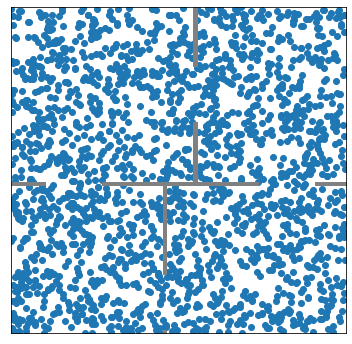

In [12]:
plt.figure(figsize=(6, 6))
plt.scatter(*rb_vec.T)
plot_walls(eval_tf_env.pyenv.envs[0].env.walls)
plt.show()

# Calculate qvalue distances

In [13]:
pdist = agent._get_pairwise_dist(rb_vec, aggregate=None).numpy()

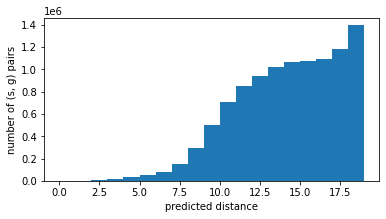

In [14]:
plt.figure(figsize=(6, 3))
plt.hist(pdist.flatten(), bins=range(20))
plt.xlabel('predicted distance')
plt.ylabel('number of (s, g) pairs')
plt.show()

# Tune edge cutoff

Plotting 230 nodes and 2260 edges


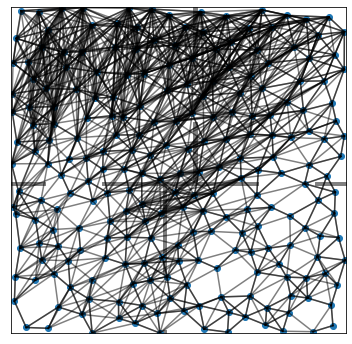

In [15]:
from sgm.planner import SGMSearchPolicy
search_policy_type = "SGM"
agent.initialize_search(rb_vec, max_search_steps=10) # needed to set agent attributes that SGMSearchPolicy constructor queries
search_policy = SGMSearchPolicy(agent, pdist, rb_vec, rb_vec, cache_pdist = True)
agent.initialize_search(search_policy.rb_vec, max_search_steps=10)

from sgm.utils.visualization import *
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 230 nodes and 1122 edges


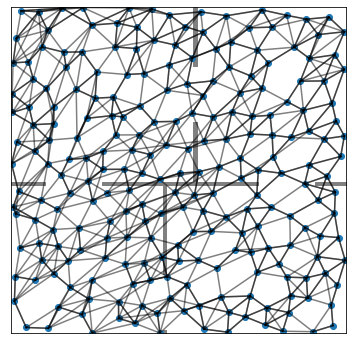

In [16]:
search_policy.keep_k_nearest(5)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 230 nodes and 910 edges


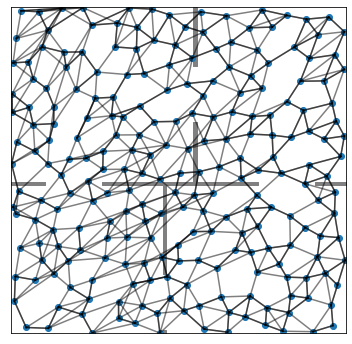

In [17]:
search_policy.keep_k_nearest(4)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 230 nodes and 688 edges


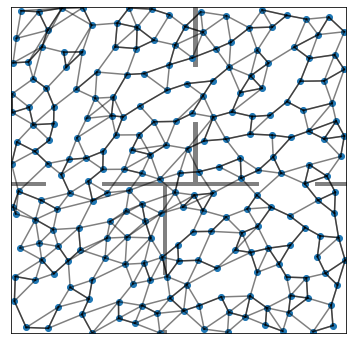

In [18]:
search_policy.keep_k_nearest(3)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 230 nodes and 460 edges


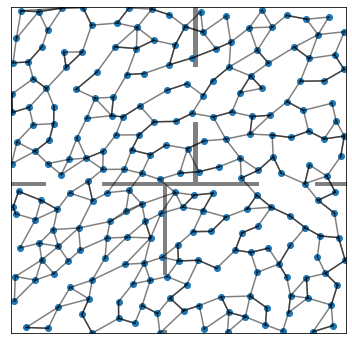

In [19]:
search_policy.keep_k_nearest(2)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 230 nodes and 230 edges


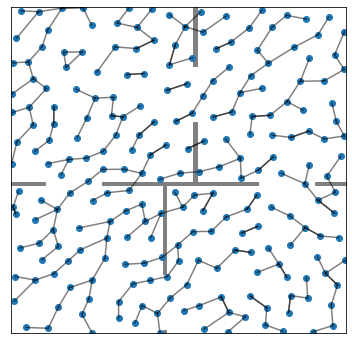

In [20]:
search_policy.keep_k_nearest(1)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

# Calculate Euclidean distances

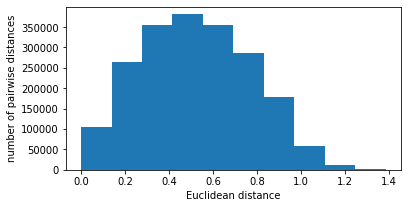

In [21]:
from scipy.spatial import distance
euclidean_dists = distance.pdist(rb_vec)

plt.figure(figsize=(6, 3))
plt.hist(euclidean_dists.flatten())
plt.xlabel('Euclidean distance')
plt.ylabel('number of pairwise distances')
plt.show()

# Initialize SGM search policy

In [22]:
from sgm.planner import SGMSearchPolicy
search_policy_type = "SGM"
agent.initialize_search(rb_vec, max_search_steps=10) # needed to set agent attributes that SGMSearchPolicy constructor queries
search_policy = SGMSearchPolicy(agent, pdist, rb_vec, rb_vec, cache_pdist = True)
agent.initialize_search(search_policy.rb_vec, max_search_steps=10)

# Cleanup and evaluate SGM

In [ ]:
from sgm.evaluation import cleanup_and_eval

logdir = os.path.join(os.getcwd(), os.pardir, "logs")
eval_difficulty = 0.95
k_nearest = 5
eval_trials = 20
total_cleanup_steps = 50000
eval_period = 5000

logfolder = cleanup_and_eval(search_policy,
                             search_policy_type,
                             desc_name,
                             eval_tf_env,
                             logdir,
                             eval_difficulty=eval_difficulty,
                             k_nearest=k_nearest,
                             eval_trials=eval_trials,
                             total_cleanup_steps=total_cleanup_steps,
                             eval_period=eval_period)

After filtering and 0 cleanup steps, SGM has success rate 0.00
Took 5000 cleanup steps and evaluated SGM success rate in 1244.44 seconds
After filtering and 5000 cleanup steps, SGM has success rate 0.05
Took 5000 cleanup steps and evaluated SGM success rate in 1168.70 seconds
After filtering and 10000 cleanup steps, SGM has success rate 0.45
Took 5000 cleanup steps and evaluated SGM success rate in 1098.30 seconds
After filtering and 15000 cleanup steps, SGM has success rate 0.70
Took 5000 cleanup steps and evaluated SGM success rate in 941.22 seconds
After filtering and 20000 cleanup steps, SGM has success rate 0.45
Took 5000 cleanup steps and evaluated SGM success rate in 965.51 seconds
After filtering and 25000 cleanup steps, SGM has success rate 0.20
Took 5000 cleanup steps and evaluated SGM success rate in 995.38 seconds
After filtering and 30000 cleanup steps, SGM has success rate 0.60
Took 5000 cleanup steps and evaluated SGM success rate in 867.71 seconds
After filtering and 35

In [31]:
from sgm.evaluation import cleanup_and_eval

logdir = os.path.join(os.getcwd(), os.pardir, "logs")
eval_difficulty = 0.95
k_nearest = 5
eval_trials = 20
total_cleanup_steps = 50000
eval_period = 5000

logfolder = cleanup_and_eval(search_policy,
                             search_policy_type,
                             desc_name,
                             eval_tf_env,
                             logdir,
                             eval_difficulty=eval_difficulty,
                             k_nearest=k_nearest,
                             eval_trials=eval_trials,
                             total_cleanup_steps=total_cleanup_steps,
                             eval_period=eval_period)

SGM has initial success rate 0.80
Evaluated initial SGM success rate in 427.01 seconds
After filtering and 0 cleanup steps, SGM has success rate 0.85
Took 5000 cleanup steps and evaluated SGM success rate in 785.02 seconds
After filtering and 5000 cleanup steps, SGM has success rate 0.75
Took 5000 cleanup steps and evaluated SGM success rate in 831.73 seconds
After filtering and 10000 cleanup steps, SGM has success rate 0.75
Took 5000 cleanup steps and evaluated SGM success rate in 827.12 seconds
After filtering and 15000 cleanup steps, SGM has success rate 0.65
Took 5000 cleanup steps and evaluated SGM success rate in 839.62 seconds
After filtering and 20000 cleanup steps, SGM has success rate 0.90
Took 5000 cleanup steps and evaluated SGM success rate in 695.15 seconds
After filtering and 25000 cleanup steps, SGM has success rate 0.80
Took 5000 cleanup steps and evaluated SGM success rate in 739.55 seconds
After filtering and 30000 cleanup steps, SGM has success rate 0.65
Took 5000 c

# Load cleanup graphs

In [30]:
from sgm.utils.visualization import *

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_initial"))
initial_graph = search_policy._g.copy()

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_filtered_0_cleanup_steps/"))
filtered_graph = search_policy._g.copy()

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_filtered_{}_cleanup_steps/".format(total_cleanup_steps)))
cleaned_graph = search_policy._g.copy()

pruned_graph = nx.difference(filtered_graph, cleaned_graph)

# Visualize cleanup graphs

In [ ]:
plot_points(search_policy.rb_vec, eval_tf_env)

In [ ]:
plot_graph(initial_graph, search_policy.rb_vec, eval_tf_env)

In [ ]:
plot_graph(filtered_graph, search_policy.rb_vec, eval_tf_env)

In [ ]:
plot_graph(cleaned_graph, search_policy.rb_vec, eval_tf_env)

In [ ]:
plot_graph(pruned_graph, search_policy.rb_vec, eval_tf_env)